# ML Cup Event #3

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.24.1.


In [4]:
# import os
# os.getcwd()

In [55]:
df = pd.read_csv("C:\\Users\\Maria\\OneDrive - Queen's University\\MMA869 Machine Learning & AI\\cup\\diabetes_train.csv")

Id_col = 'Id'
target_col = 'diabetes'
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  576 non-null    int64  
 1   num_times_pregnant  576 non-null    int64  
 2   plasma_glucose      576 non-null    int64  
 3   DBP                 576 non-null    int64  
 4   triceps_skin        576 non-null    int64  
 5   serum_insulin       576 non-null    int64  
 6   BMI                 576 non-null    float64
 7   pedigree            576 non-null    float64
 8   age                 576 non-null    int64  
 9   diabetes            576 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 45.1 KB


,Id,num_times_pregnant,plasma_glucose,DBP,triceps_skin,serum_insulin,BMI,pedigree,age,diabetes
0,358,13,129,0,30,0,39.9,0.569,44,1
1,74,4,129,86,20,270,35.1,0.231,23,0
2,353,3,61,82,28,0,34.4,0.243,46,0
3,498,2,81,72,15,76,30.1,0.547,25,0
4,146,0,102,75,23,0,0.0,0.572,21,0


In [56]:
from sklearn.model_selection import train_test_split

X = df.drop([Id_col, target_col], axis=1)
y = df[target_col]

In [31]:
# X.info()
# X.shape
# X.head()

# X_train.info()
# X_train.shape
# X_train.head()

In [5]:
np.bincount(y)

array([377, 199], dtype=int64)

Feature Engineering


In [75]:
from sklearn import preprocessing


scaler = preprocessing.PowerTransformer(method='box-cox').fit(X[['pedigree']])
X['pedigree_BoxCox'] = scaler.transform(X[['pedigree']])   

scaler = preprocessing.MinMaxScaler().fit(X[['num_times_pregnant']])
X['num_times_pregnant_MinMax'] = scaler.transform(X[['num_times_pregnant']])   

scaler = preprocessing.MinMaxScaler().fit(X[['BMI']])
X['BMI_MinMax'] = scaler.transform(X[['BMI']])   


scaler = preprocessing.StandardScaler().fit(X[['plasma_glucose']])
X['plasma_glucose_Scaled'] = scaler.transform(X[['plasma_glucose']])   


scaler = preprocessing.StandardScaler().fit(X[['DBP']])
X['DBP_Scaled'] = scaler.transform(X[['DBP']])   


scaler = preprocessing.StandardScaler().fit(X[['triceps_skin']])
X['triceps_skin_Scaled'] = scaler.transform(X[['triceps_skin']])  

scaler = preprocessing.StandardScaler().fit(X[['serum_insulin']])
X['serum_insulin_Scaled'] = scaler.transform(X[['serum_insulin']])   

scaler = preprocessing.PowerTransformer(method='box-cox').fit(X[['age']])
X['age_BoxCox'] = scaler.transform(X[['age']]) 

X['triceps_skin_less5'] = np.where(X['triceps_skin'] < 5, 1, 0)
X['serum_insulin_less50'] = np.where(X['serum_insulin'] < 50, 1, 0) #diebetic
X['plasma_glucose_less100'] = np.where(X['plasma_glucose'] < 100, 0, 1)#diebetic
X['insulin_plasma_interact'] = X['serum_insulin'] * X['plasma_glucose']
X['insulin_plasma_interact_no0'] = X['serum_insulin'] * X['serum_insulin_less50'] * X['plasma_glucose'] * X['plasma_glucose_less100']
X['insulin_no0'] = X['serum_insulin'] * X['serum_insulin_less50']
X['plasma_no0'] = X['plasma_glucose'] * X['plasma_glucose_less100']
X['insulin_plasma'] = X['serum_insulin'] + X['plasma_glucose']

type(X)
X.head()

pandas.core.frame.DataFrame

,num_times_pregnant,plasma_glucose,DBP,triceps_skin,serum_insulin,BMI,pedigree,age,pedigree_BoxCox,num_times_pregnant_MinMax,...,serum_insulin_Scaled,age_BoxCox,triceps_skin_less5,serum_insulin_less50,plasma_glucose_less100,insulin_plasma_interact,insulin_plasma_interact_no0,insulin_no0,plasma_no0,insulin_plasma
0,13,129,0,30,0,39.9,0.569,44,0.647010,0.764706,...,-0.692052,1.125826,0,1,1,0,0,0,129,129
1,4,129,86,20,270,35.1,0.231,23,-0.754227,0.235294,...,1.633077,-1.032515,0,0,1,34830,0,0,129,399
2,3,61,82,28,0,34.4,0.243,46,-0.672647,0.176471,...,-0.692052,1.223511,0,1,0,0,0,0,0,61
3,2,81,72,15,76,30.1,0.547,25,0.587923,0.117647,...,-0.037571,-0.658736,0,0,0,6156,0,0,0,157
4,0,102,75,23,0,0.0,0.572,21,0.654875,0.000000,...,-0.692052,-1.482669,0,1,1,0,0,0,102,102


C:\Users\Maria\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (576). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


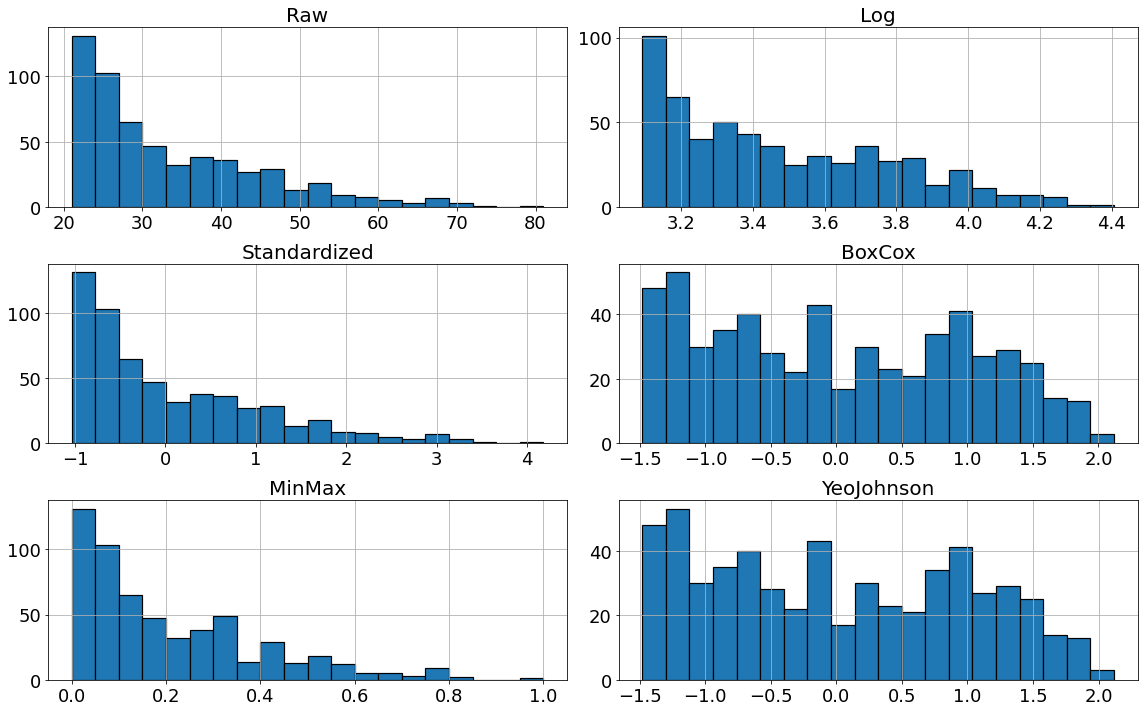

In [53]:
# scaler = preprocessing.PowerTransformer(method='yeo-johnson').fit(X[['BMI']])
# X['BMI_YeoJohnson'] = scaler.transform(X[['BMI']])  

# scaler = preprocessing.QuantileTransformer(random_state=0).fit(X[['BMI']])
# X['BMI_Uniform'] = scaler.transform(X[['BMI']])  

# scaler = preprocessing.MinMaxScaler().fit(X[['plasma_glucose']])
# X['plasma_glucose_MinMax'] = scaler.transform(X[['plasma_glucose']])   

# scaler = preprocessing.PowerTransformer(method='yeo-johnson').fit(X[['plasma_glucose']])
# X['plasma_glucose_YeoJohnson'] = scaler.transform(X[['plasma_glucose']])  

# scaler = preprocessing.MinMaxScaler().fit(X[['DBP']])
# X['DBP_MinMax'] = scaler.transform(X[['DBP']])   

# scaler = preprocessing.PowerTransformer(method='yeo-johnson').fit(X[['DBP']])
# X['DBP_YeoJohnson'] = scaler.transform(X[['DBP']])  


In [51]:
X.head()

,num_times_pregnant,plasma_glucose,DBP,triceps_skin,serum_insulin,BMI,pedigree,age,pedigree_BoxCox,num_times_pregnant_MinMax,...,DBP_YeoJohnson,DBP_Uniform,DBP_Log,triceps_skin_Scaled,triceps_skin_MinMax,triceps_skin_YeoJohnson,triceps_skin_Uniform,triceps_skin_Log,triceps_skin_less5,serum_insulin_less50
0,13,129,0,30,0,39.9,0.569,44,0.647010,0.764706,...,-2.913487,0.000000,0.000000,0.616770,0.476190,0.677559,0.680870,3.433987,0,1
1,4,129,86,20,270,35.1,0.231,23,-0.754227,0.235294,...,1.049859,0.877391,4.465908,-0.032106,0.317460,0.191536,0.446957,3.044522,0,0
2,3,61,82,28,0,34.4,0.243,46,-0.672647,0.176471,...,0.753238,0.806957,4.418841,0.486995,0.444444,0.586764,0.626957,3.367296,0,1
3,2,81,72,15,76,30.1,0.547,25,0.587923,0.117647,...,0.052170,0.516522,4.290459,-0.356544,0.238095,-0.091022,0.349565,2.772589,0,0
4,0,102,75,23,0,0.0,0.572,21,0.654875,0.000000,...,0.256320,0.618261,4.330733,0.162557,0.365079,0.346568,0.506957,3.178054,0,1


# Build Model

In [76]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=22)
clf.fit(X_train, y_train)

y_pred_lr = clf.predict(X_val)

from sklearn.metrics import classification_report

print(classification_report(y_val, y_pred_lr))

C:\Users\Maria\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=22)

              precision    recall  f1-score   support

           0       0.80      0.85      0.83        81
           1       0.60      0.51      0.55        35

    accuracy                           0.75       116
   macro avg       0.70      0.68      0.69       116
weighted avg       0.74      0.75      0.74       116



In [78]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# define models and parameters
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=clf, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1_macro',error_score=0)
grid_result = grid_search.fit(X, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.733205 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.732623 (0.066957) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.678524 (0.053041) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.728902 (0.066870) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.729475 (0.066807) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.674821 (0.051118) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.729642 (0.067337) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.731405 (0.068442) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.669511 (0.049593) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.733205 (0.065944) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.730646 (0.064692) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.667635 (0.046069) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.732953 (0.062770) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.726970 (0.061680) wit

In [61]:
grid_search.best_params_

{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}

# Create Submission File on Test Data

In [79]:
test_df = pd.read_csv("C:\\Users\\Maria\\OneDrive - Queen's University\\MMA869 Machine Learning & AI\\cup\\diabetes_test.csv")

# Make sure to transform/create the features the same way you did for training
# For now, nothing to do

X_test = test_df.drop([Id_col], axis=1)



In [81]:
from sklearn import preprocessing

scaler = preprocessing.PowerTransformer(method='box-cox').fit(X_test[['pedigree']])
X_test['pedigree_BoxCox'] = scaler.transform(X_test[['pedigree']])   

scaler = preprocessing.MinMaxScaler().fit(X_test[['num_times_pregnant']])
X_test['num_times_pregnant_MinMax'] = scaler.transform(X_test[['num_times_pregnant']])   

scaler = preprocessing.MinMaxScaler().fit(X_test[['BMI']])
X_test['BMI_MinMax'] = scaler.transform(X_test[['BMI']])   


scaler = preprocessing.StandardScaler().fit(X_test[['plasma_glucose']])
X_test['plasma_glucose_Scaled'] = scaler.transform(X_test[['plasma_glucose']])   


scaler = preprocessing.StandardScaler().fit(X_test[['DBP']])
X_test['DBP_Scaled'] = scaler.transform(X_test[['DBP']])   


scaler = preprocessing.StandardScaler().fit(X_test[['triceps_skin']])
X_test['triceps_skin_Scaled'] = scaler.transform(X_test[['triceps_skin']])  

scaler = preprocessing.StandardScaler().fit(X_test[['serum_insulin']])
X_test['serum_insulin_Scaled'] = scaler.transform(X_test[['serum_insulin']])   

scaler = preprocessing.PowerTransformer(method='box-cox').fit(X_test[['age']])
X_test['age_BoxCox'] = scaler.transform(X_test[['age']]) 

X_test['triceps_skin_less5'] = np.where(X_test['triceps_skin'] < 5, 1, 0)
X_test['serum_insulin_less50'] = np.where(X_test['serum_insulin'] < 50, 1, 0) #diebetic
X_test['plasma_glucose_less100'] = np.where(X_test['plasma_glucose'] < 100, 0, 1)#diebetic
X_test['insulin_plasma_interact'] = X_test['serum_insulin'] * X_test['plasma_glucose']
X_test['insulin_plasma_interact_no0'] = X_test['serum_insulin'] * X_test['serum_insulin_less50'] * X_test['plasma_glucose'] * X_test['plasma_glucose_less100']
X_test['insulin_no0'] = X_test['serum_insulin'] * X_test['serum_insulin_less50']
X_test['plasma_no0'] = X_test['plasma_glucose'] * X_test['plasma_glucose_less100']
X_test['insulin_plasma'] = X_test['serum_insulin'] + X_test['plasma_glucose']


type(X_test)
X_test.head()

pandas.core.frame.DataFrame

,num_times_pregnant,plasma_glucose,DBP,triceps_skin,serum_insulin,BMI,pedigree,age,pedigree_BoxCox,num_times_pregnant_MinMax,...,serum_insulin_Scaled,age_BoxCox,triceps_skin_less5,serum_insulin_less50,plasma_glucose_less100,insulin_plasma_interact,insulin_plasma_interact_no0,insulin_no0,plasma_no0,insulin_plasma
0,6,98,58,33,190,34.0,0.430,43,0.140340,0.461538,...,0.996866,0.944008,0,0,0,18620,0,0,0,288
1,2,112,75,32,0,35.7,0.148,21,-1.568589,0.153846,...,-0.695899,-1.484919,0,1,1,0,0,0,112,112
2,2,108,64,0,0,30.8,0.158,21,-1.462191,0.153846,...,-0.695899,-1.484919,1,1,1,0,0,0,108,108
3,8,107,80,0,0,24.6,0.856,34,1.213762,0.615385,...,-0.695899,0.325251,1,1,1,0,0,0,107,107
4,7,136,90,0,0,29.9,0.210,50,-1.001709,0.538462,...,-0.695899,1.273144,1,1,1,0,0,0,136,136


In [83]:
# Use your model to make predictions
pred_test = grid_result.predict(X_test)

# We will look at the predicted prices to ensure we have something sensible.
print(pred_test)

my_submission = pd.DataFrame({'Id': test_df.Id, 'Predicted': pred_test})

my_submission.head()

# you could use any filename. We choose submission here
my_submission.to_csv("C:\\Users\\Maria\\OneDrive - Queen's University\\MMA869 Machine Learning & AI\\cup\\my_submission3.csv", index=False)

[0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1
 0 0 0 1 0 0 0]


,Id,Predicted
0,669,0
1,325,0
2,625,0
3,691,0
4,474,0


In [2]:
!pip install autosklearn

ERROR: Could not find a version that satisfies the requirement autosklearn
ERROR: No matching distribution found for autosklearn


In [ ]:
# print autosklearn version
import autosklearn
print('autosklearn: %s' % autosklearn.__version__)